In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ss = pd.read_csv('/content/sample_data/superstore.csv')

In [4]:
ss.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,00:00.0,CA-2011-130813,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,00:00.0,CA-2011-148614,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,00:00.0,CA-2011-146969,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


### Q1: Data Cleaning:

## i. Count and handle Missing values.

In [5]:
ss.isnull().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


In [8]:
state_null_df = ss[ss['State'].isnull()]

In [9]:
state_null_df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
1439,Office Supplies,Seattle,United States,LL-168404,Lauren Leatherbury,0.0,US,1,00:00.0,CA-2012-164833,...,9,Consumer,00:00.0,Same Day,1.82,NaN,Art,2012,North America,23
1440,Office Supplies,Seattle,United States,LL-168404,Lauren Leatherbury,0.0,US,1,00:00.0,CA-2012-164833,...,7,Consumer,00:00.0,Same Day,1.56,NaN,Labels,2012,North America,23
1452,Office Supplies,Seattle,United States,SG-200804,Sandra Glassco,0.0,US,1,00:00.0,CA-2012-162544,...,5,Consumer,00:00.0,First Class,0.09,NaN,Paper,2012,North America,51


In [10]:
ss.loc[(ss['State'].isnull()) & (ss['City'] == 'Seattle'), 'State'] = 'Washington'

In [11]:
ss[ss['City'] == 'Seattle'][['City', 'State']]

,City,State
1427,Seattle,Washington
1428,Seattle,Washington
1429,Seattle,Washington
1430,Seattle,Washington
1431,Seattle,Washington
...,...,...
48358,Seattle,Washington
48359,Seattle,Washington
48360,Seattle,Washington
48361,Seattle,Washington


In [12]:
ss.isnull().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


In [13]:
ss.columns = ss.columns.str.replace('.', '_', regex=False)

In [14]:
ss.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', '记录数', 'Order_Date', 'Order_ID', 'Order_Priority',
       'Product_ID', 'Product_Name', 'Profit', 'Quantity', 'Region', 'Row_ID',
       'Sales', 'Segment', 'Ship_Date', 'Ship_Mode', 'Shipping_Cost', 'State',
       'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [15]:
ss['Shipping_Cost'] = ss['Shipping_Cost'].fillna(ss['Shipping_Cost'].median())

In [16]:
ss['Shipping_Cost'].isnull().sum()

np.int64(0)

## ii. Deal with Duplicate values

In [17]:
ss.duplicated().sum()

np.int64(0)

## iii. Delete unknown columns if present.

In [24]:
un_cols = [col for col in ss.columns if not col.isascii()]

In [25]:
un_cols

['记录数']

In [26]:
ss = ss.drop(columns=un_cols)

In [27]:
ss.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', 'Order_Date', 'Order_ID', 'Order_Priority',
       'Product_ID', 'Product_Name', 'Profit', 'Quantity', 'Region', 'Row_ID',
       'Sales', 'Segment', 'Ship_Date', 'Ship_Mode', 'Shipping_Cost', 'State',
       'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

## iv. Check shape, size, and datatypes of the dataset features

In [28]:
ss.shape

(51290, 26)

In [30]:
ss.size

1333540

In [31]:
ss.dtypes

,0
Category,object
City,object
Country,object
Customer_ID,object
Customer_Name,object
Discount,float64
Market,object
Order_Date,object
Order_ID,object
Order_Priority,object


### Q2: Perform Univariate Analysis across all numerical features,

In [35]:
num_cols = ['Discount', 'Profit', 'Quantity', 'Sales']

In [36]:
ss[num_cols].describe()

,Discount,Profit,Quantity,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440
std,0.212280,174.340972,2.278766,487.567175
min,0.000000,-6599.978000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,31.000000
50%,0.000000,9.240000,3.000000,85.000000
75%,0.200000,36.810000,5.000000,251.000000
max,0.850000,8399.976000,14.000000,22638.000000


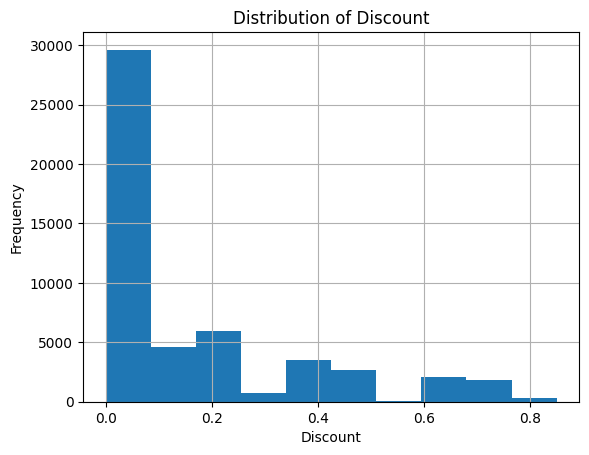

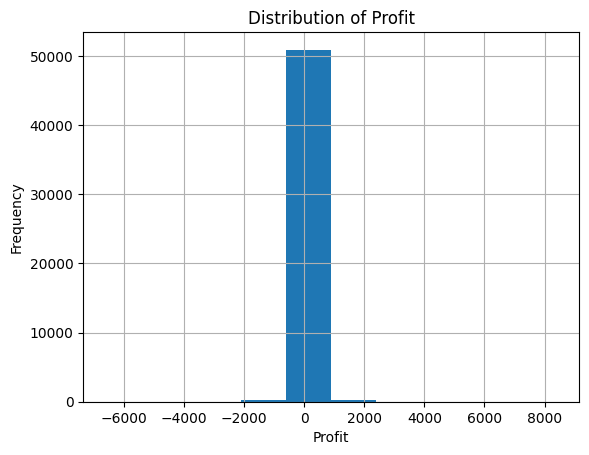

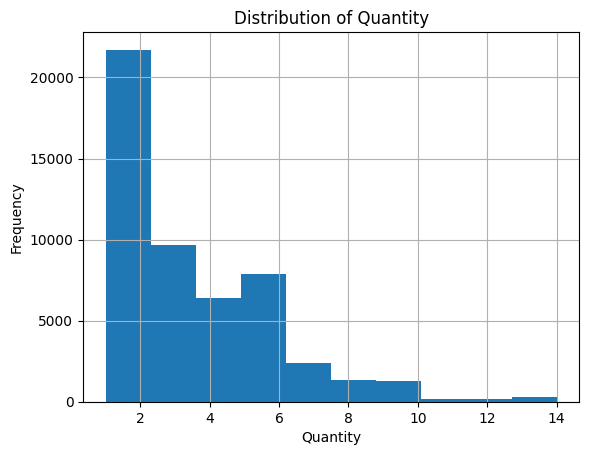

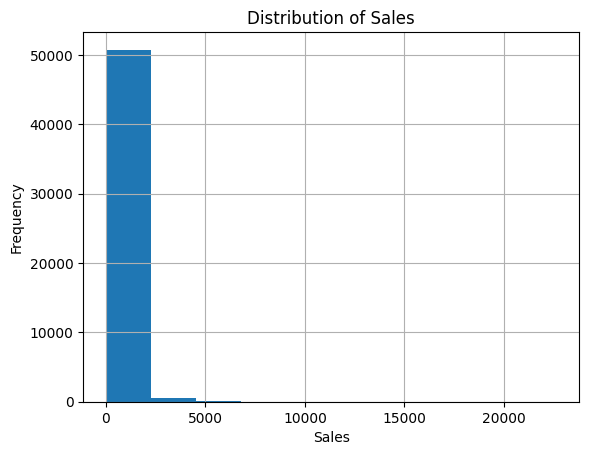

In [37]:
for col in num_cols:
    plt.figure()
    ss[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

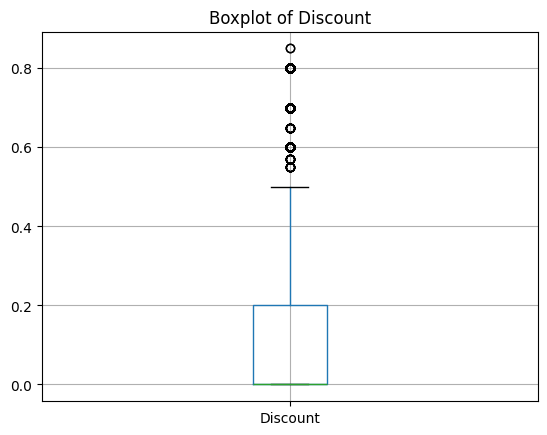

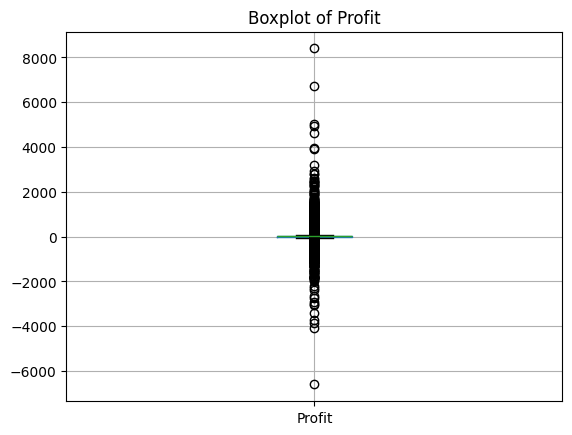

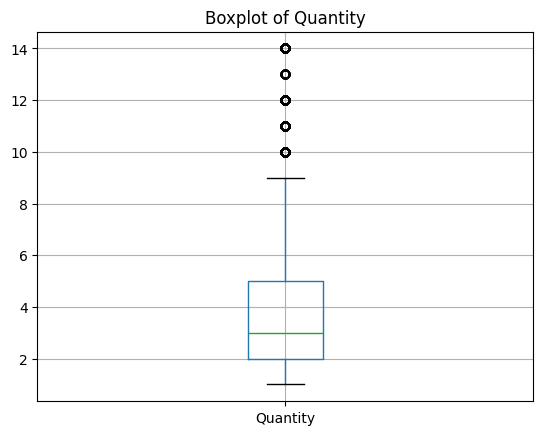

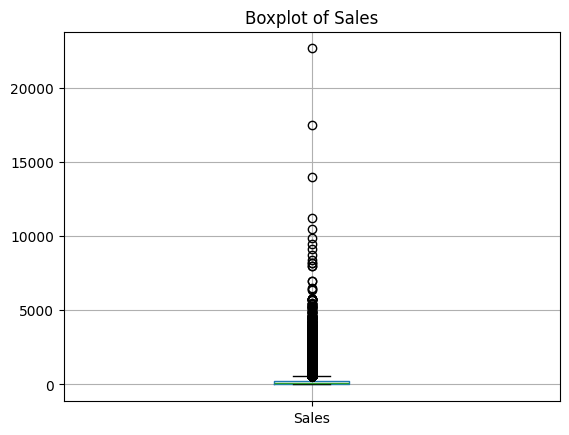

In [38]:
for col in num_cols:
    plt.figure()
    ss.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## i. Which features seem useless in the analysis? Explain why?

Not found any useless analysis.

## ii. Which features are uniformly distributed or normally distributed?

profit is close to normal distribustion but no column of uniform distribution.

### iii. Which features are right-skewed/left-skewed? What does this signify?

Right-skewed - sales,profit,discount
Left-skewed - quatity

In [39]:
skewness = ss[num_cols].skew()

In [40]:
skewness

,0
Discount,1.387775
Profit,4.157189
Quantity,1.360368
Sales,8.137981


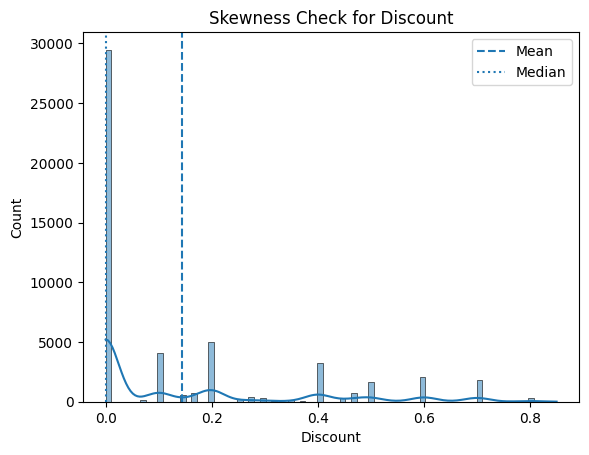

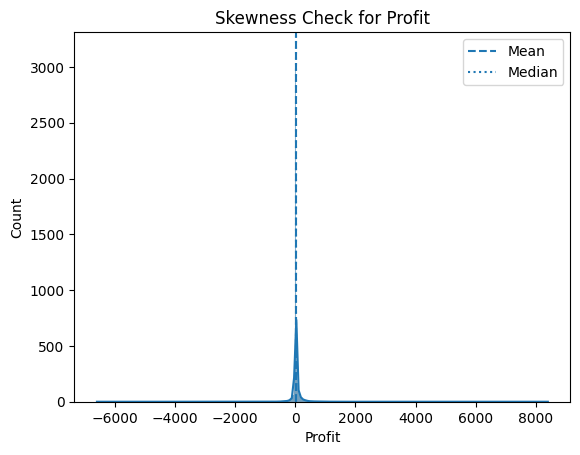

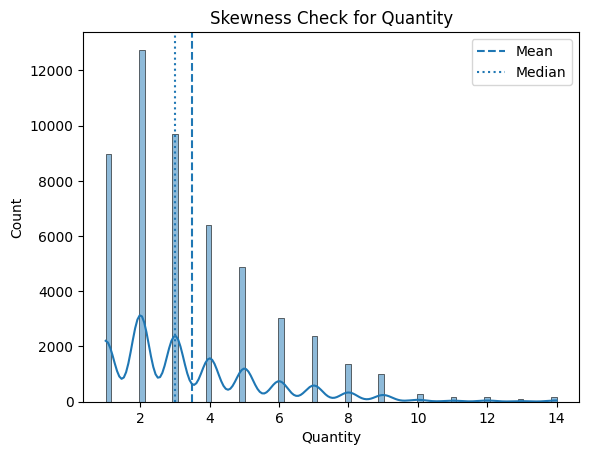

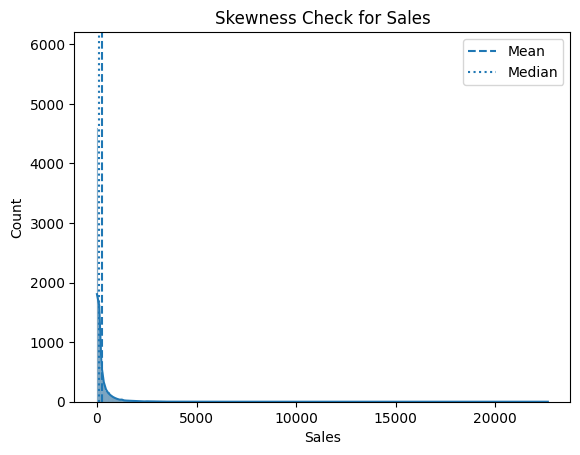

In [41]:
for col in num_cols:
    plt.figure()
    sns.histplot(ss[col], kde=True)
    plt.axvline(ss[col].mean(), linestyle='--', label='Mean')
    plt.axvline(ss[col].median(), linestyle=':', label='Median')
    plt.title(f'Skewness Check for {col}')
    plt.legend()
    plt.show()

## iv. Which features have a high number of outliers, and discuss the impact.

sales has high number of outliers.

In [44]:
outliers = {}

for col in num_cols:
    Q1 = ss[col].quantile(0.25)
    Q3 = ss[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = ss[(ss[col] < lower_bound) | (ss[col] > upper_bound)]

In [45]:
for col in outliers:
    print(f"{col} outliers count:", outliers[col].shape[0])

Discount outliers count: 4172
Profit outliers count: 9755
Quantity outliers count: 877
Sales outliers count: 5655


### Q 3: Perform Univariate Analysis across all categorical features.

In [46]:
ss.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', 'Order_Date', 'Order_ID', 'Order_Priority',
       'Product_ID', 'Product_Name', 'Profit', 'Quantity', 'Region', 'Row_ID',
       'Sales', 'Segment', 'Ship_Date', 'Ship_Mode', 'Shipping_Cost', 'State',
       'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [47]:
cat_cols = ['Category', 'City', 'Country', 'Market', 'Order_Priority',
       'Product_Name', 'Region',
      'Segment', 'State',
       'Sub_Category', 'Market2']

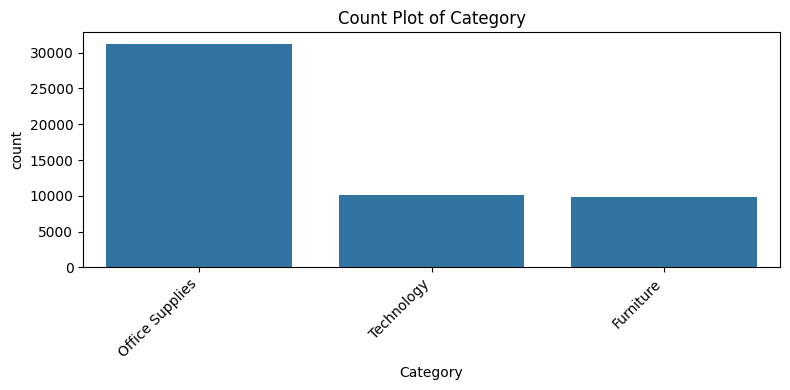

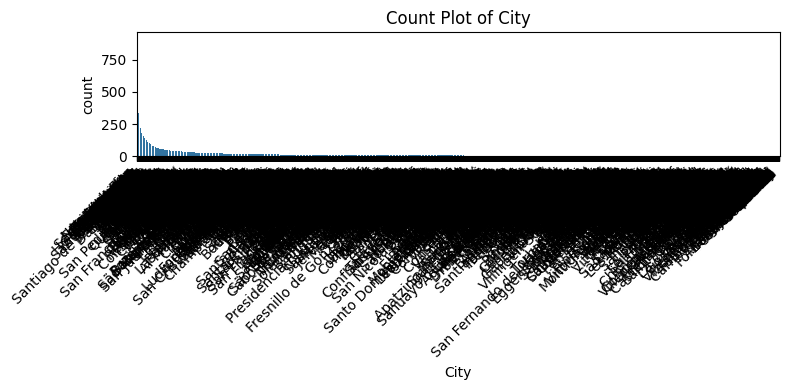

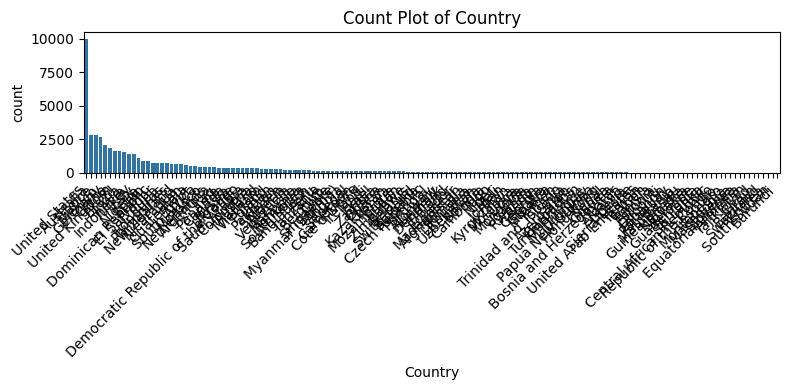

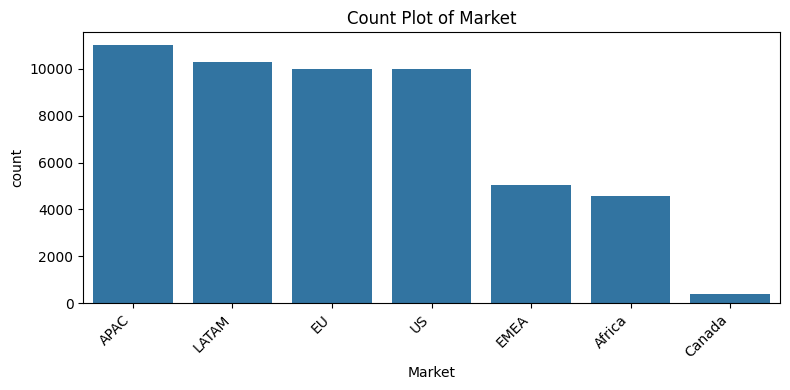

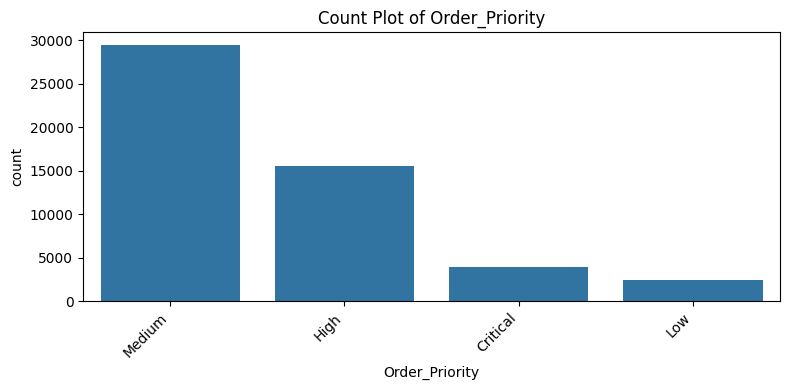

/tmp/ipython-input-3966730050.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


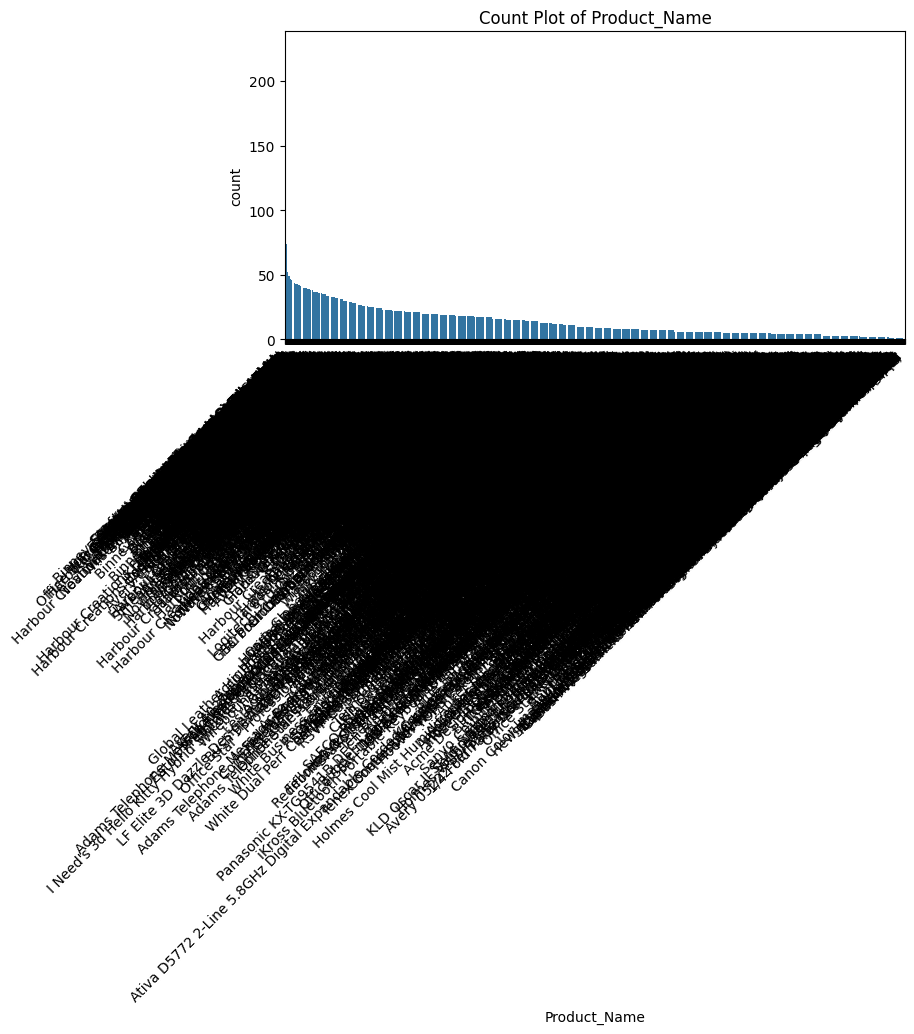

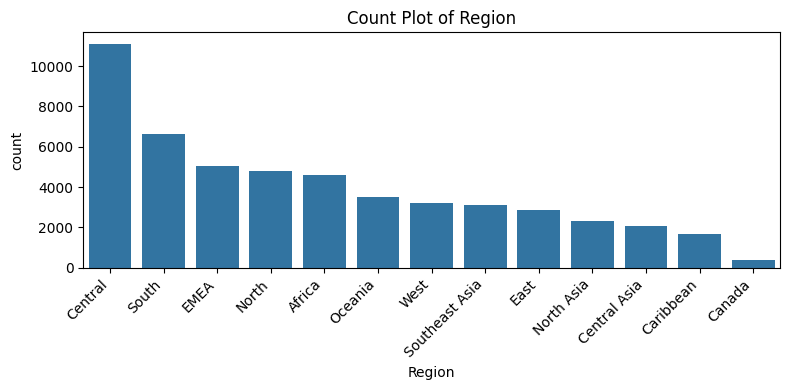

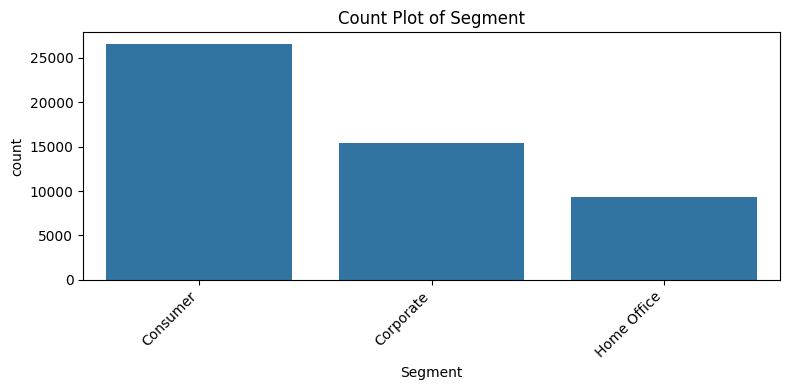

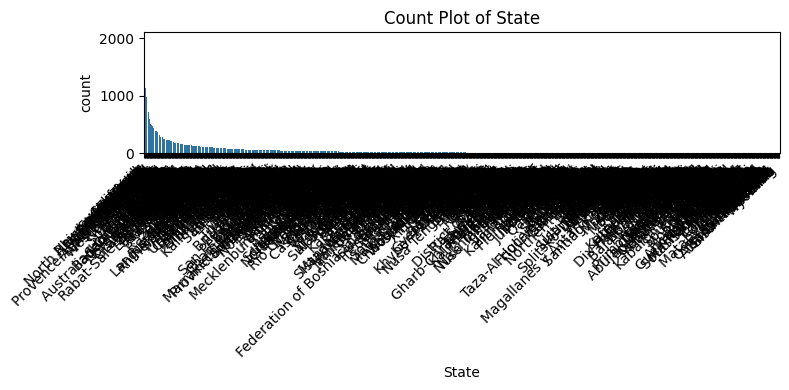

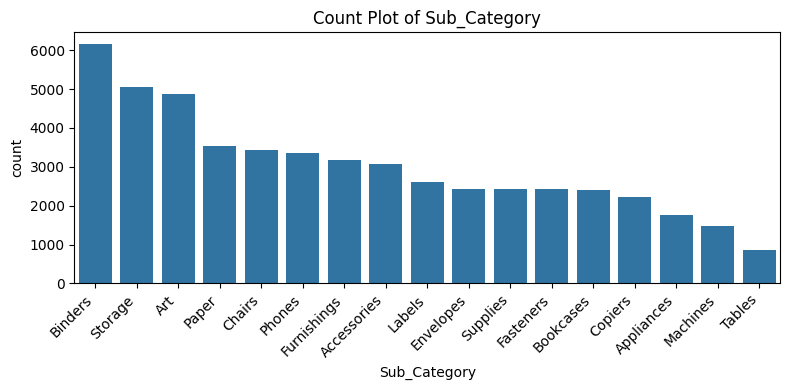

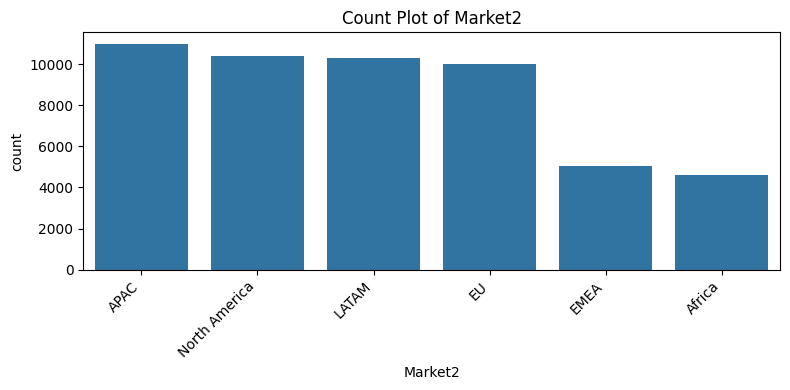

In [48]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=ss, x=col, order=ss[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## i. Which features seem inaccurate and are not useful as categorical “insights” directly?

More usdful for - categories, sub categories, segment, region, market and market2

not useful for - country and city

## What’s the issue with treating Customer? Name as a categorical feature for modeling?

Not considered for this analysis cause it has high number of unique values

## iii. Is the Category distribution balanced or skewed? Give a 1-line reason.

balanced skewed cause distributed evennly across all categories.

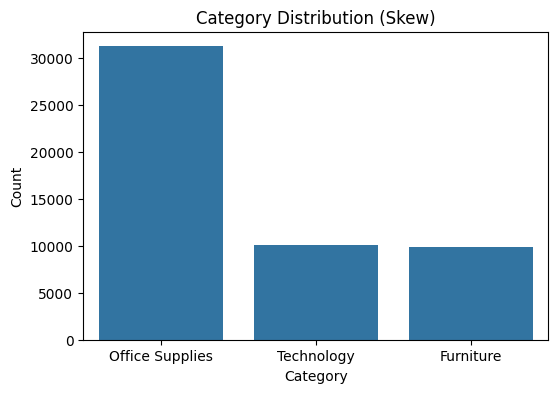

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ss, x='Category', order=ss['Category'].value_counts().index)
plt.title('Category Distribution (Skew)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## iv. In Country, does one country dominate strongly? What does that imply about geographic bias?

Yes, United states.

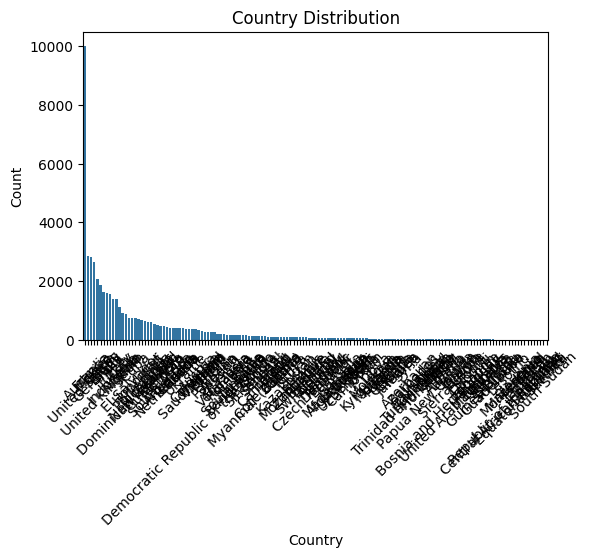

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ss, x='Country', order=ss['Country'].value_counts().index)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
ss['Country'].value_counts().reset_index()

,Country,count
0,United States,9994
1,Australia,2837
2,France,2827
3,Mexico,2644
4,Germany,2065
...,...,...
142,Bahrain,2
143,Swaziland,2
144,Eritrea,2
145,South Sudan,2


## v. Is the City dataset concentrated in a few cities or spread out?

If we not consider some contries then yes it's spread out.

In [58]:
ss['City'].value_counts().reset_index()

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Santo Domingo,443
...,...,...
3631,Chapel Hill,1
3632,Goldsboro,1
3633,Bartlett,1
3634,Ormond Beach,1


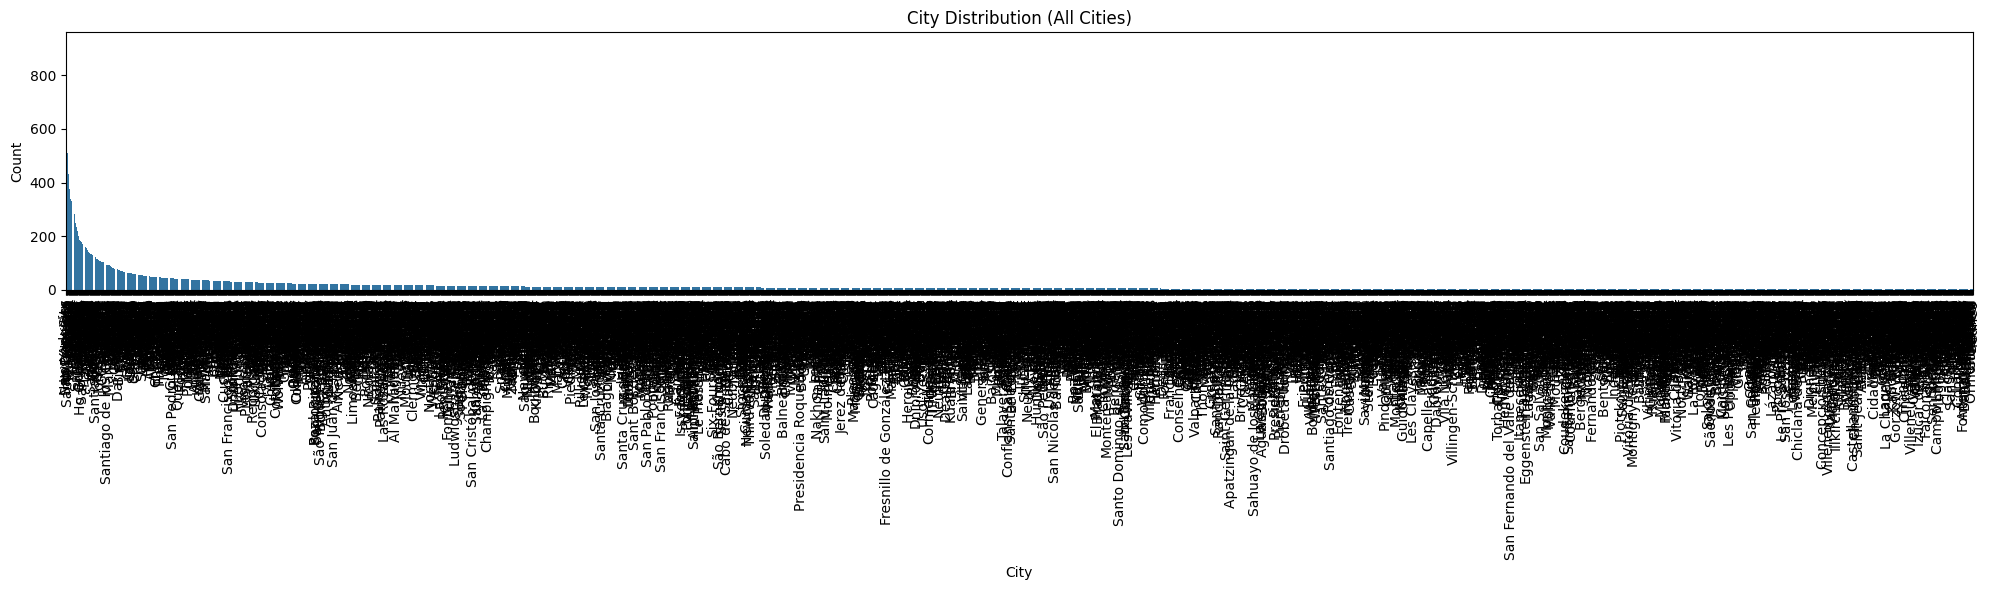

In [59]:
plt.figure(figsize=(20, 6))
sns.countplot(data=ss,x='City',order=ss['City'].value_counts().index)
plt.title('City Distribution (All Cities)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Q 4: Perform Bivariant Analysis for numerical-to-numerical features:

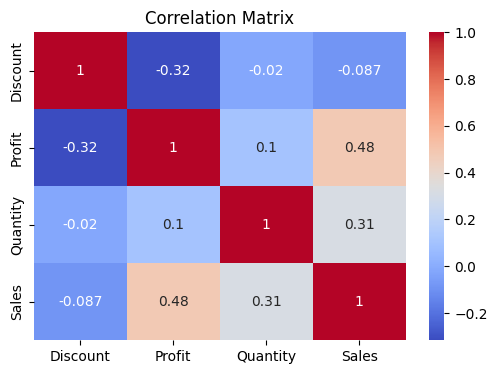

In [60]:
plt.figure(figsize=(6, 4))
sns.heatmap(ss[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

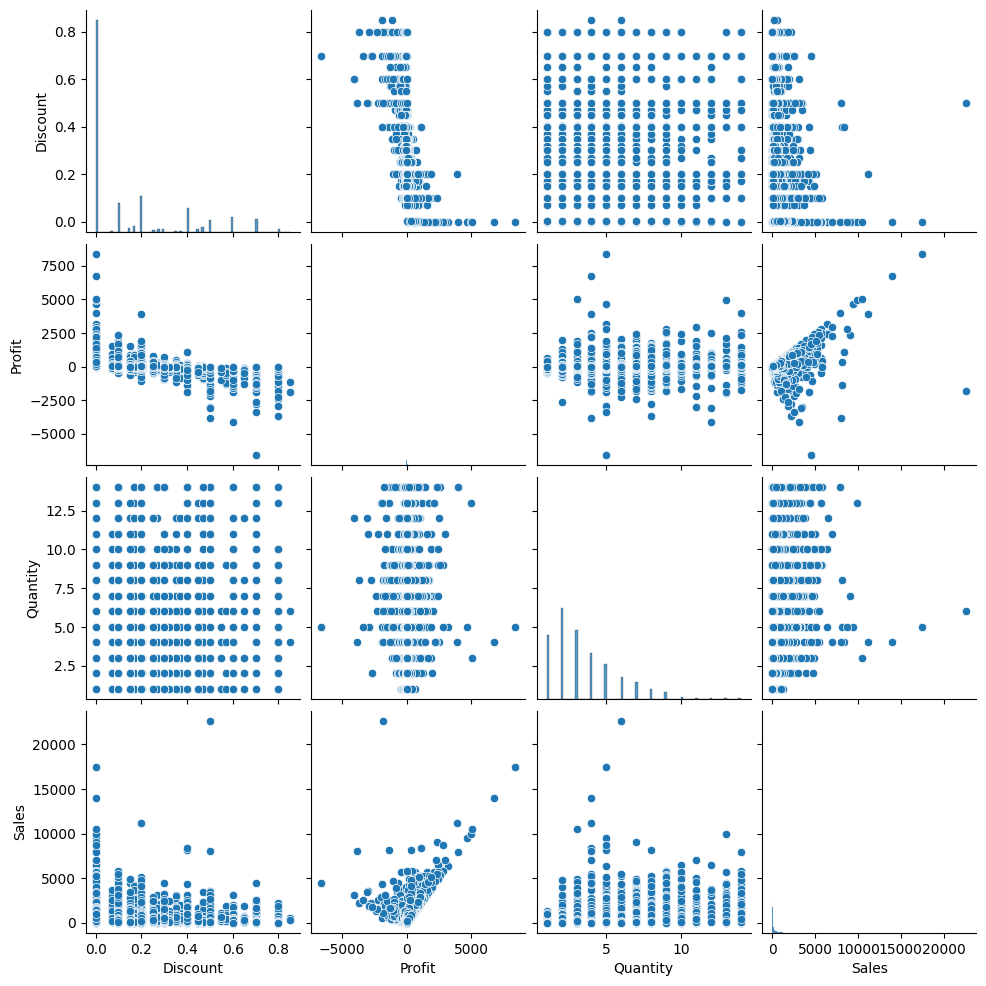

In [61]:
sns.pairplot(ss[num_cols])
plt.show()

#3 i. Which two features are most strongly correlated?

PRofit and sales

## ii. Also name features that are negatively correlated.

Quantity and Discount

## iii. If your goal is to understand profi t, which are the most useful next bivariate checks? Perform them and give clear insights.

profit vs sales

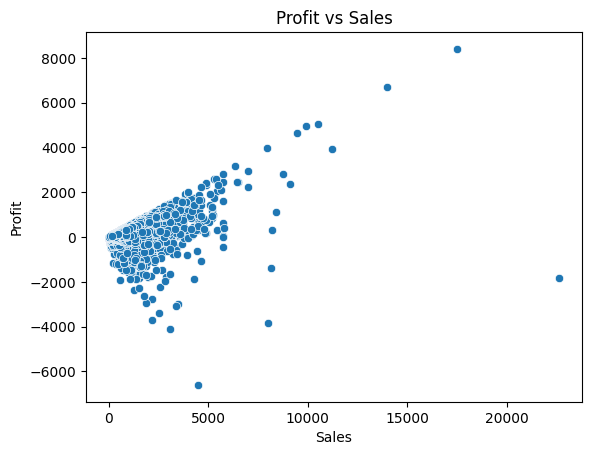

In [64]:
plt.figure()
sns.scatterplot(data=ss, x='Sales', y='Profit')
plt.title('Profit vs Sales')
plt.show()

## iv. Look for Time Effects Clues. Mention any information you find about the time relationship with any feature.

Time vs sales,profit and quatity show increasing graph

In [68]:
ss['Order_Date'] = pd.to_datetime(ss['Order_Date'])

In [69]:
yearly_data = ss.groupby('Year')[num_cols].agg({
    'Discount': 'mean',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()

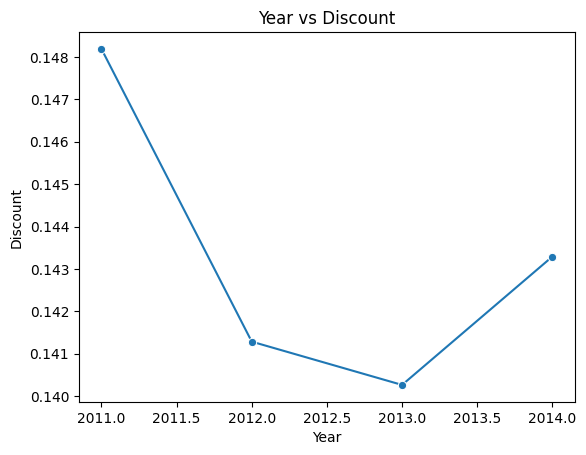

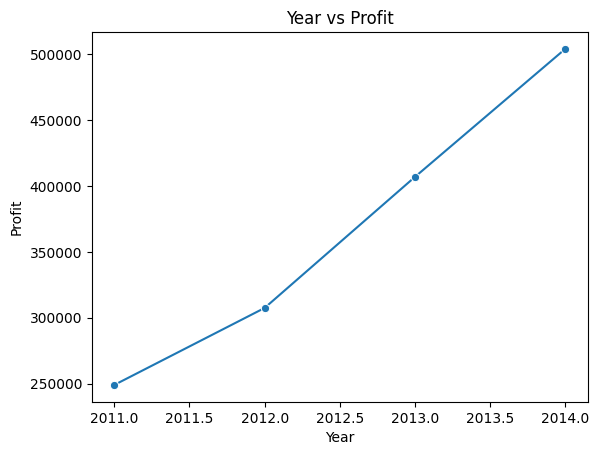

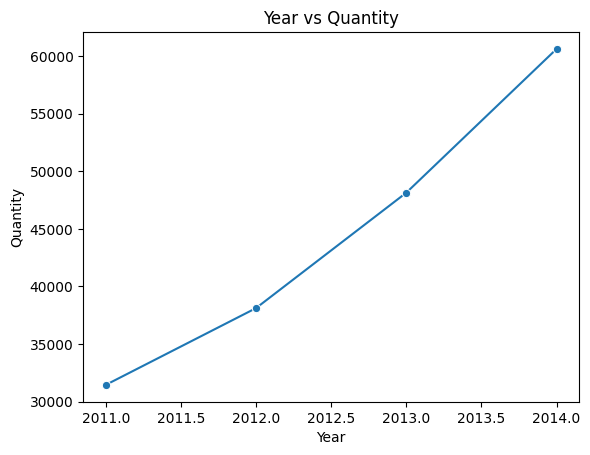

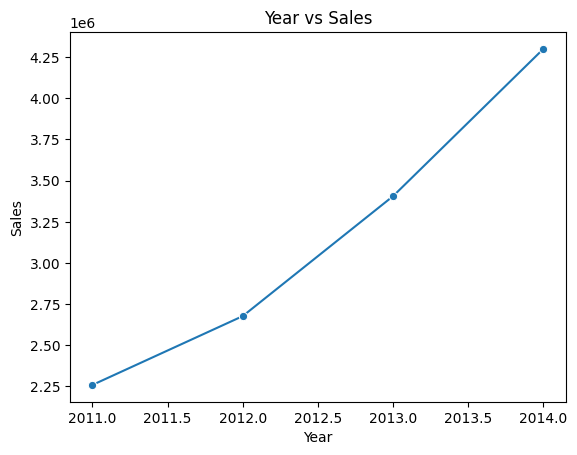

In [70]:
for col in num_cols:
    plt.figure()
    sns.lineplot(data=yearly_data, x='Year', y=col, marker='o')
    plt.title(f'Year vs {col}')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

## Q 5: Perform Bi-variant Analysis for categorical to numerical features.


## i. Profi t by Category: Which category has the highest median profi t? Which has the lowest? Which category shows the widest spread (largest IQR) in Profi t? What does that suggest about profi t consistency?

In [73]:
ss.groupby('Category')['Profit'].median().sort_values(ascending=False)

,Profit
Category,
Technology,29.9400
Furniture,15.5022
Office Supplies,6.5538


In [74]:
Q1 = ss.groupby('Category')['Profit'].quantile(0.25)
Q3 = ss.groupby('Category')['Profit'].quantile(0.75)
iqr_profit = (Q3 - Q1).sort_values(ascending=False)

iqr_profit

,Profit
Category,
Technology,98.350
Furniture,81.535
Office Supplies,20.130


In [75]:
cv_profit = (ss.groupby('Category')['Profit'].std() /
             ss.groupby('Category')['Profit'].mean()).rename('CV')

In [76]:
profit_consistency = pd.concat([iqr_profit, cv_profit], axis=1)

In [78]:
profit_consistency.sort_values(by='Profit')

,Profit,CV
Category,,
Office Supplies,20.130,6.619791
Furniture,81.535,7.125005
Technology,98.350,4.143542


## ii. Sales by Category: Which category has the highest median sales? Does it also have the highest median profit?

In [79]:
median_sales = ss.groupby('Category')['Sales'].median().sort_values()

In [80]:
median_sales

,Sales
Category,
Office Supplies,46.0
Furniture,220.0
Technology,260.0


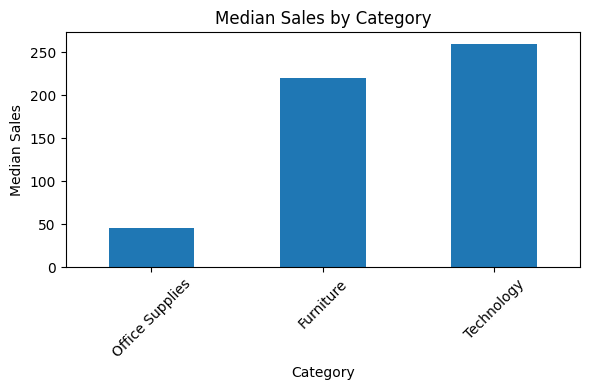

In [81]:
plt.figure(figsize=(6, 4))
median_sales.plot(kind='bar')
plt.title('Median Sales by Category')
plt.xlabel('Category')
plt.ylabel('Median Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## iii. Profi t by Segment: Which segment has the highest median profi t? Which segment has the most negative/low profi t outliers?

In [82]:
median_profit_segment = ss.groupby('Segment')['Profit'].median().sort_values()

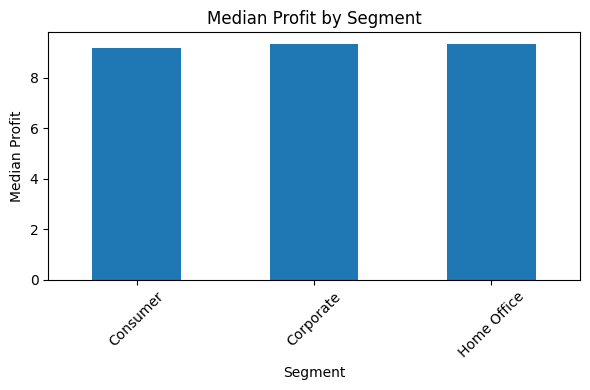

In [83]:
plt.figure(figsize=(6, 4))
median_profit_segment.plot(kind='bar')
plt.title('Median Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Median Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
median_profit_segment

,Profit
Segment,
Consumer,9.1800
Corporate,9.3152
Home Office,9.3200


## iv. Sales by Segment: Which segment has the highest median sales? Is the profi t pattern consistent with sales?

no highest
no

In [87]:
median_sales_segment = ss.groupby('Segment')['Sales'].median().sort_values()

In [88]:
median_sales_segment

,Sales
Segment,
Consumer,85.0
Corporate,85.0
Home Office,85.0


### Q 6: Perform Bivariate Analysis for Market features against Region, Category, and Country:

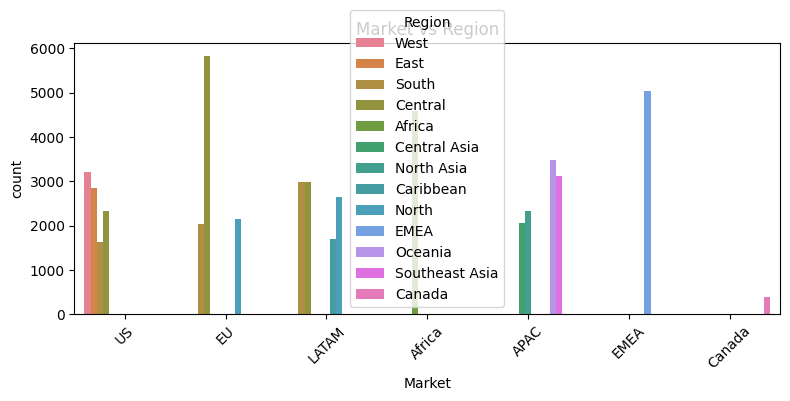

In [89]:
plt.figure(figsize=(8, 4))
sns.countplot(data=ss, x='Market', hue='Region')
plt.title('Market vs Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

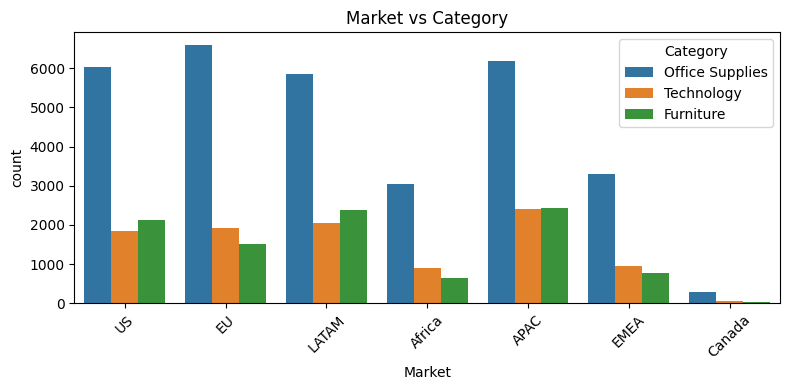

In [90]:
plt.figure(figsize=(8, 4))
sns.countplot(data=ss, x='Market', hue='Category')
plt.title('Market vs Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1858315771.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


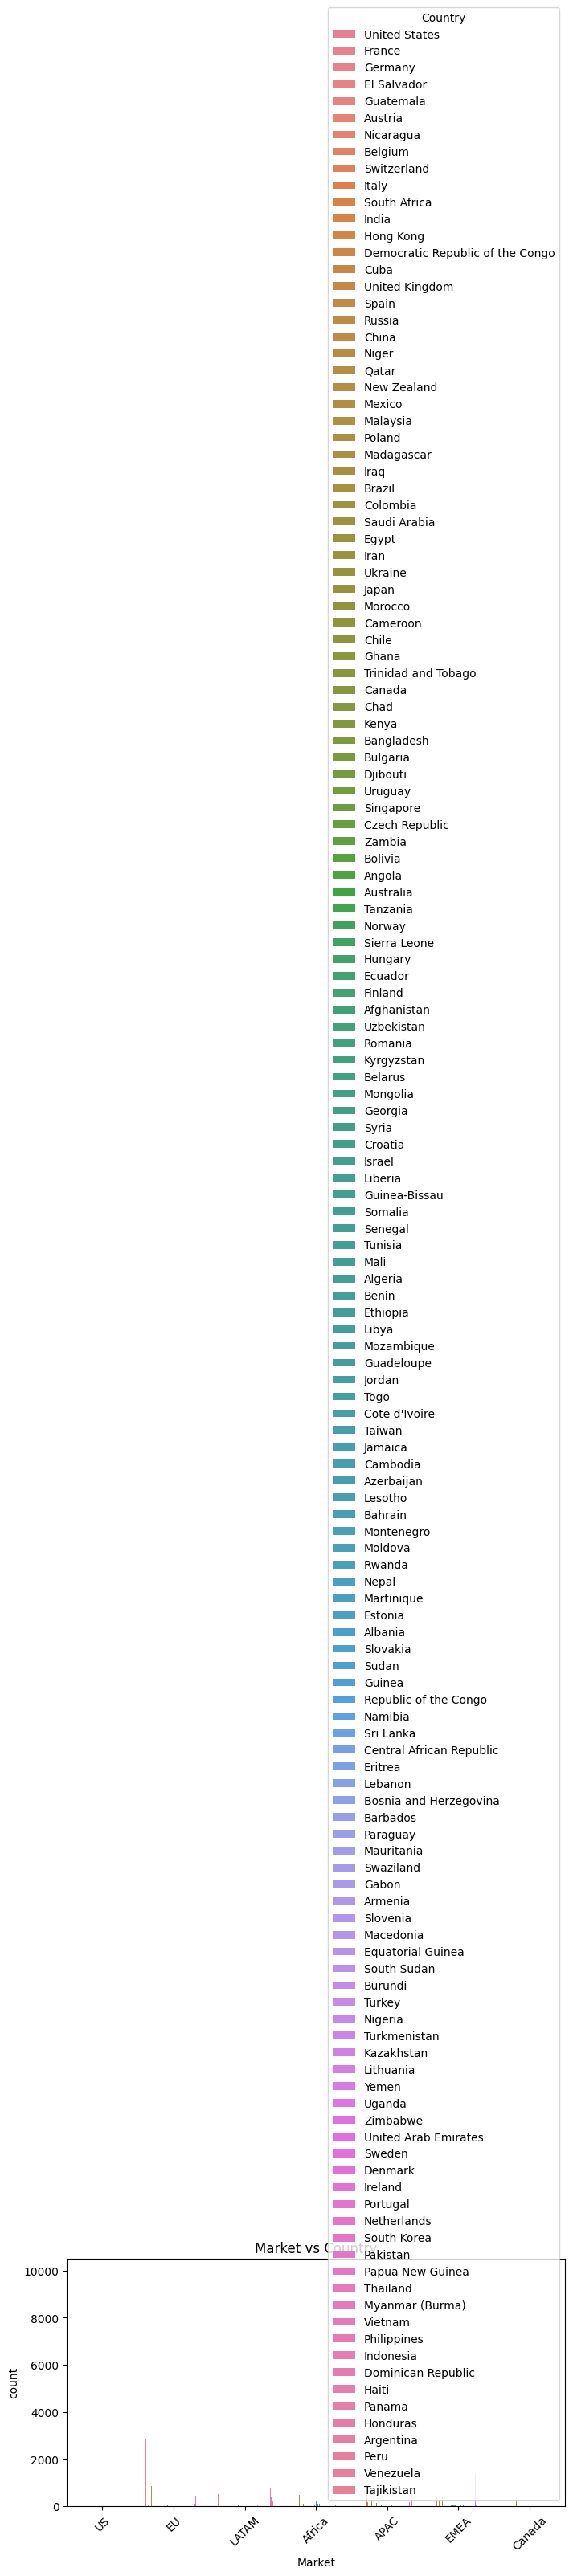

In [91]:
plt.figure(figsize=(8, 4))
sns.countplot(data=ss, x='Market', hue='Country')
plt.title('Market vs Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## i. Is the Market is not randomly spread across all Regions?

This question does not give any significanse cause it's hierarchy data.

## ii. Which country has negligible office supply orders?

Amenia, Bahrain, Eritrea

In [93]:
ss[ss['Category'] == 'Office Supplies'].groupby('Country').size().reset_index(name='Office_Supply_Orders').sort_values(by='Office_Supply_Orders')

,Country,Office_Supply_Orders
5,Armenia,1
9,Bahrain,1
39,Eritrea,1
120,Swaziland,1
38,Equatorial Guinea,2
...,...,...
46,Germany,1348
80,Mexico,1492
6,Australia,1608
43,France,1854
